<a href="https://colab.research.google.com/github/anuhyaponugoti/Covid-19-Vaccination-Analysis/blob/main/CovidVaccines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Analysis of COVID-19 Vaccination Data from Across the Globe**

*Julia Burek and Ani Ponugoti*

In [ ]:
import pandas as pd
import numpy as py

In [ ]:
import plotly
import plotly.express as px

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving country_vaccinations.csv to country_vaccinations.csv


In [ ]:
import io
covid = pd.read_csv(io.BytesIO(uploaded['country_vaccinations.csv']))

This dataset was obtained from Kaggle and it contains COVID-19 vaccination data from various countries. The dataset includes the country, country’s iso code, date of entry, total number of vaccinations, total number of people vaccinated, total number of people fully vaccinated, daily vaccinations, total vaccinations per hundred, total number of vaccinations per hundred, total number of people fully vaccinated per hundred, number of vaccinations per day, daily vaccinations per million, vaccines used in the country, source where this information was found, and the website to the source. 

We named this dataset "covid".

## Cleaning the Data

We started by dropping the rows with missing values from the "covid" dataset.

In [ ]:
covid = covid.dropna()
covid

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
84,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://twitter.com/gmanastirliu/status/138096...
370,Argentina,ARG,2021-01-21,265724.0,249372.0,16352.0,17791.0,11704.0,0.59,0.55,0.04,259.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
371,Argentina,ARG,2021-01-22,279602.0,254456.0,25146.0,13878.0,11263.0,0.62,0.56,0.06,249.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
372,Argentina,ARG,2021-01-23,288064.0,258876.0,29188.0,8462.0,11124.0,0.64,0.57,0.06,246.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
373,Argentina,ARG,2021-01-24,292023.0,260036.0,31987.0,3959.0,10342.0,0.65,0.58,0.07,229.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,Zimbabwe,ZWE,2021-04-06,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94,0.16,738.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
10885,Zimbabwe,ZWE,2021-04-07,179417.0,153238.0,26179.0,16784.0,12505.0,1.21,1.03,0.18,841.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
10886,Zimbabwe,ZWE,2021-04-08,193677.0,166543.0,27134.0,14260.0,12624.0,1.30,1.12,0.18,849.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
10887,Zimbabwe,ZWE,2021-04-09,206205.0,178237.0,27968.0,12528.0,11636.0,1.39,1.20,0.19,783.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...


We created a subsetted dataset called "USA" that contains only data from the United States. We then dropped rows with missing values from USA and renamed it "df".

In [ ]:
USA=covid[covid.country=='United States']
df=USA.dropna()
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
10503,United States,USA,2021-01-14,11148991.0,9690757.0,1342086.0,870529.0,747082.0,3.33,2.90,0.40,2234.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
10504,United States,USA,2021-01-15,12279180.0,10595866.0,1610524.0,1130189.0,798707.0,3.67,3.17,0.48,2388.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
10509,United States,USA,2021-01-20,16525281.0,14270441.0,2161419.0,817693.0,892403.0,4.94,4.27,0.65,2668.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
10510,United States,USA,2021-01-21,17546374.0,15053257.0,2394961.0,1021093.0,913912.0,5.25,4.50,0.72,2733.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
10511,United States,USA,2021-01-22,19107959.0,16243093.0,2756953.0,1561585.0,975540.0,5.71,4.86,0.82,2917.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


## Analysis using Data Visualization Techniques

In this section, we first ask questions relevant to the data and use data visualization techniques to answer them.

**Question**: Is the daily rate of vaccinations per million in the US increasing over time?
We wanted to determine if the percent change in daily vaccinations is increasing or if there is an apparent trend.

In [ ]:
percentchange=df['daily_vaccinations_per_million'].pct_change()
pctchange=percentchange*100
px.line(df,x='date',y=pctchange, title='Percent Change in Daily Vaccinations Per Million in the United States', labels={'y':'Percent Change','date':'Date'})

There does not seem to be a clear trend in daily percent change. There is some variation in the line graph in daily percent change. It does appear, however, that daily percent change ranges between 0-6%.

**Question**: How many people in millions in the United States have been vaccinated with at least one dose over time? We want to see the trend of vaccination numbers within the United States.

In [ ]:
fig=px.line(df, x='date',y='people_vaccinated', title='Number of People Vaccinated Over Time (At Least One Dose)', labels= {'people_vaccinated':'People Vaccinated in Millions','date':'Date'})
fig.show()

Based on this line graph, there is a clear steady trend upwards in vaccination numbers. Approximately every 14 days, there is an approximate increase in 10-15 million vaccinations distributed. According to this dataset, there are nearly 120 million Americans vaccinated with at least one dose.

In [ ]:
fig1=px.line(df, x='date',y='people_fully_vaccinated', title='Number of People Fully Vaccinated Over Time', labels= {'people_fully_vaccinated':'People Fully Vaccinated in Millions','date':'Date'})
fig1.show()

Based on this line graph, there is a clear steady trend upwards in fully vaccination numbers. There appears to be slight exponential growth. Approximately every 14 days, there is roughly an increase in 10 million people fully vaccinated. According to this dataset, there are approximately 70 million Americans fully vaccinated.

**Question:** How do the countries' percentages of people fully vaccinated compare to one another?

In [ ]:
fig2=px.line(covid.dropna(), x='date', y='people_fully_vaccinated_per_hundred', color='country', title='Percentage of People Fully Vaccinated Over Time by Country', labels={'people_fully_vaccinated_per_hundred':'Percentage of People Fully Vaccinated', 'date':'Date'})
fig2.show()

While this graph shows some interesting trends for various countries, we wanted to select a few countries to look more closely at their vaccination numbers.

Which countries have the most people fully vaccinated per hundred?

In [ ]:
UK=covid[covid.country=='United Kingdom'].dropna()
CAN=covid[covid.country=='Canada'].dropna()
CHI=covid[covid.country=='China'].dropna()
ISR=covid[covid.country=='Israel'].dropna()
GIB=covid[covid.country=='Gibraltar'].dropna()
ITA=covid[covid.country=='Italy'].dropna()
AUS=covid[covid.country=='Australia'].dropna()
NZ=covid[covid.country=='New Zealand'].dropna()
MEX=covid[covid.country=='Mexico'].dropna()

covid2=df.append(UK).append(CAN).append(CHI).append(ISR).append(GIB).append(ITA).append(AUS).append(NZ).append(MEX)
fig1=px.line(covid2, x='date', y='people_fully_vaccinated_per_hundred', color='country', title='Percentage of People Fully Vaccinated Over Time by Country', labels={'people_fully_vaccinated_per_hundred':'Percentage of People Fully Vaccinated','date':'Date'})
fig1.show()

We selected a few countries to take a closer look at their vaccination numbers. Gibraltar has the highest percentage of its people fully vaccinated at 88.13%. Israel follows behind at 56.86%. It is important to note that Gibraltar is a British Overseas Territory, and its population is significantly lower than the other countries included in this dataset, which may contribute to its high percentage of people fully vaccinated.

**Question:** Which country has the greatest total amount of vaccines?

In [ ]:
vaccine=covid.groupby('country').total_vaccinations.agg('max').sort_values(ascending=False)
vaccine1=vaccine[vaccine>2000000]
px.bar(vaccine, x=vaccine1.index, y=vaccine1.values, title='Countries With the Greatest Total Vaccinations', labels={'y':'Total Vaccines','x':'Country'})


The United States leads the race of vaccination with total vaccinations at 183.47 million. India has the next highest total vaccinations with 101.60 million.

**Question:** Which countries have the greatest number of people fully vaccinated?

In [ ]:
vaccinefull=covid.groupby('country').people_fully_vaccinated.agg('max').sort_values(ascending=False)
vaccinefull2=vaccinefull[vaccinefull>1000000]
px.bar(vaccinefull, x=vaccinefull2.index, y=vaccinefull2.values, title='Countries With the Most People Fully Vaccinated', labels={'y':'People in Millions','x':'Country'})


The United States has the greatest number of people fully vaccinated with over 70 million people. The United States compared to other countries has much greater numbers in the amount of people fully vaccinated.

### Vaccination Maps

We created choropleth maps to more cohesively display different statistics regarding vaccination distribution of different countries. We first created a subsetted dataset, "maxvaccine", that only contains the most recent data provided for each country, and used this dataset for the choropleth maps.

In [ ]:
maxvaccine=covid.groupby('country').agg('max')
maxvaccine

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://twitter.com/gmanastirliu/status/138096...
Argentina,ARG,2021-04-10,5201468.0,4478948.0,722520.0,245445.0,146082.0,11.51,9.91,1.60,3232.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
Austria,AUT,2021-04-10,2089837.0,1480000.0,609837.0,73748.0,45066.0,23.20,16.43,6.77,5004.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
Azerbaijan,AZE,2021-04-10,1153549.0,739319.0,414230.0,43698.0,54088.0,11.38,7.29,4.09,5335.0,Sinovac,Government of Azerbaijan,https://koronavirusinfo.az/az/post/756
Bahrain,BHR,2021-04-10,939068.0,562253.0,376815.0,23499.0,20163.0,55.19,33.04,22.14,11850.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Health,https://healthalert.gov.bh/en/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,GBR,2021-04-09,39001554.0,32010244.0,6991310.0,844285.0,602266.0,57.45,47.15,10.30,8872.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
United States,USA,2021-04-10,183467709.0,117142879.0,70692645.0,4629928.0,3111327.0,54.86,35.03,21.14,9303.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
Uruguay,URY,2021-04-10,1024533.0,825641.0,198892.0,54067.0,38019.0,29.49,23.77,5.73,10945.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://monitor.uruguaysevacuna.gub.uy/


For each choropleth map, we set the color argument equal to the variable we were focusing on, which allows for each country to be displayed in the color corresponding to the intensity of the variable we are focusing on. If there is no data available for a country, the country will be displayed in a light blue-gray color and will have no hover data available.

The first two maps look at the people fully vaccinated, meaning they have gotten all the doses for the vaccine they have taken. The first map looks at the percentage of people fully vaccinated, and the second map looks at the number of people fully vaccinated.

**Question:** What country has the highest percentage of people fully vaccinated?

In [ ]:
fig3 = px.choropleth(maxvaccine, locations="iso_code",
                    color="people_fully_vaccinated_per_hundred", 
                    hover_name=maxvaccine.index,
                    hover_data=['total_vaccinations_per_hundred',
                                'people_vaccinated_per_hundred',
                                'daily_vaccinations_per_million'], labels={'people_fully_vaccinated_per_hundred':'Percent of People Fully Vaccinated','iso_code':"Country's ISO Code",'people_vaccinated_per_hundred':'Percent of People Vaccinated','total_vaccinations_per_hundred':'Percent of Total Vaccinations','daily_vaccinations_per_million':'Number of Daily Vaccinations per Million People'},
                    color_continuous_scale=px.colors.sequential.dense, range_color=(0, 50))
fig3.update_layout(title_text = 'Percent of People Fully Vaccinated by Country')
fig3.show()

According to this map, Israel has the highest percentage of people fully vaccinated at 56.86%. Chile at 24.29%, the United Arab Emirates at 22.12%, and the United States at 21.14%, follow and rank among the countries with the highest percentage of people fully vaccinated.

**Question:** What country has the highest number of people fully vaccinated?

In [ ]:
fig4 = px.choropleth(maxvaccine, locations="iso_code",
                    color="people_fully_vaccinated", 
                    hover_name=maxvaccine.index, hover_data=['total_vaccinations',
                                'people_vaccinated',
                                'daily_vaccinations'], labels={'people_fully_vaccinated':'Number of People Fully Vaccinated','iso_code':"Country's ISO Code",'people_vaccinated':'Number of People Vaccinated','total_vaccinations':'Number of Total Vaccinations','daily_vaccinations':'Number of Daily Vaccinations'},
                    color_continuous_scale=px.colors.sequential.OrRd)
fig4.update_layout(title_text = 'Number of People Fully Vaccinated by Country')
fig4.show()

According to this map, the United States has the highest number of people fully vaccinated by far, at around 70.69 million people. It is followed by India at around 12.71 million and Turkey at around 7.58 million.

The next two maps look at the people vaccinated, meaning they have gotten at least one dose of the vaccine and are not necessarily fully vaccinated. The first map looks at the percentage of people vaccinated, and the second map looks at the number of people vaccinated.

**Question:** What country has the highest percentage of people vaccinated who have gotten at least one dose?

In [ ]:
fig5 = px.choropleth(maxvaccine, locations="iso_code",
                    color="people_vaccinated_per_hundred", 
                    hover_name=maxvaccine.index,
                    hover_data=['total_vaccinations_per_hundred',
                                'people_vaccinated_per_hundred',
                                'daily_vaccinations_per_million', 'people_fully_vaccinated_per_hundred'], labels={'people_fully_vaccinated_per_hundred':'Percent of People Fully Vaccinated','iso_code':"Country's ISO Code",'people_vaccinated_per_hundred':'Percent of People Vaccinated','total_vaccinations_per_hundred':'Percent of Total Vaccinations','daily_vaccinations_per_million':'Number of Daily Vaccinations per Million People'},
                    color_continuous_scale=px.colors.sequential.dense, range_color=(0, 60))
fig5.update_layout(title_text = 'Percent of People Vaccinated by Country')
fig5.show()

According to this map, Israel, at 61.35%, has the highest percentage of people vaccinated (have gotten at least one dose). The United Kingdom at 47.15%, Chile at 38.47%, the United Arab Emirates at 35.19%, and the United States at 35.03%, follow.

**Question:** What country has the highest number of people vaccinated?

In [ ]:
fig6 = px.choropleth(maxvaccine, locations="iso_code",
                    color="people_vaccinated", 
                    hover_name=maxvaccine.index, hover_data=['people_fully_vaccinated',
                                'people_vaccinated',
                                'daily_vaccinations','total_vaccinations'], labels={'people_fully_vaccinated':'Number of People Fully Vaccinated','iso_code':"Country's ISO Code",'people_vaccinated':'Number of People Vaccinated','total_vaccinations':'Number of Total Vaccinations','daily_vaccinations':'Number of Daily Vaccinations'},
                    color_continuous_scale=px.colors.sequential.OrRd)
fig6.update_layout(title_text = 'Number of People Vaccinated by Country')
fig6.show()

According to this map, the United States, at 117.14 million people, has the highest number of people vaccinated (have gotten at least one dose). The United States is followed by India at 88.89 million and the United Kingdom at 32.01 million. 

In [ ]:
covid.head()
time = covid[covid.country == "United States"][["date","people_vaccinated_per_hundred"]]
time = time.rename(columns = {"date":"ds", "people_vaccinated_per_hundred":"y"})
time

,ds,y
10503,2021-01-14,2.90
10504,2021-01-15,3.17
10509,2021-01-20,4.27
10510,2021-01-21,4.50
10511,2021-01-22,4.86
...,...,...
10585,2021-04-06,32.38
10586,2021-04-07,32.89
10587,2021-04-08,33.50
10588,2021-04-09,34.22


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


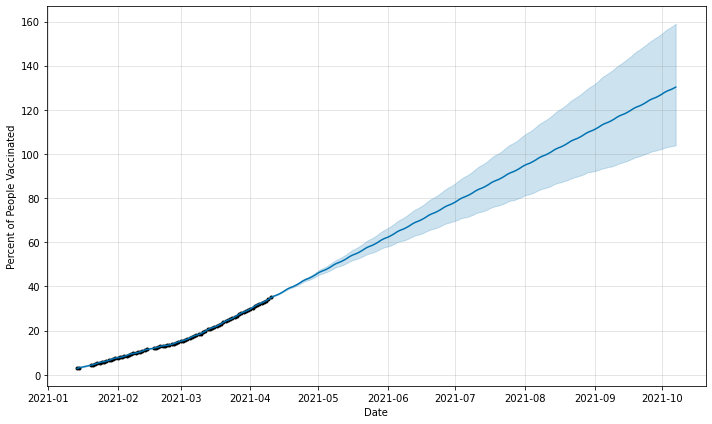

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-14,2.974217,2.800723,2.929381,2.974217,2.974217,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,0.0,0.0,0.0,2.866175
1,2021-01-15,3.210896,3.118441,3.253861,3.210896,3.210896,-0.022183,-0.022183,-0.022183,-0.022183,-0.022183,-0.022183,0.0,0.0,0.0,3.188712
2,2021-01-20,4.394287,4.197958,4.331121,4.394287,4.394287,-0.128777,-0.128777,-0.128777,-0.128777,-0.128777,-0.128777,0.0,0.0,0.0,4.265509
3,2021-01-21,4.630965,4.459358,4.589988,4.630965,4.630965,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,0.0,0.0,0.0,4.522922
4,2021-01-22,4.875555,4.789011,4.914378,4.875555,4.875555,-0.022183,-0.022183,-0.022183,-0.022183,-0.022183,-0.022183,0.0,0.0,0.0,4.853372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2021-10-03,128.258839,103.100568,156.299266,102.998978,156.191183,0.151017,0.151017,0.151017,0.151017,0.151017,0.151017,0.0,0.0,0.0,128.409856
257,2021-10-04,128.790309,103.349419,156.945918,103.345329,156.857544,0.063709,0.063709,0.063709,0.063709,0.063709,0.063709,0.0,0.0,0.0,128.854019
258,2021-10-05,129.321779,103.508748,157.521997,103.599126,157.611633,-0.088408,-0.088408,-0.088408,-0.088408,-0.088408,-0.088408,0.0,0.0,0.0,129.233372
259,2021-10-06,129.853249,103.694702,158.225249,103.832012,158.368766,-0.128777,-0.128777,-0.128777,-0.128777,-0.128777,-0.128777,0.0,0.0,0.0,129.724472


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet

covid.rename
m = Prophet()
m.fit(time)

future = m.make_future_dataframe(periods = 180)
forecast = m.predict(future)
fig7 = m.plot(forecast, xlabel = 'Date', ylabel = 'Percent of People Vaccinated')
plt.show()
forecast


Based on this model, 100% of people in the United States are predicted to be vaccinated by the beginning of August.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
metric_df = forecast.set_index('ds')[['yhat']].join(time.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
r2 = r2_score(metric_df.y, metric_df.yhat)
mse = mean_squared_error(metric_df.y, metric_df.yhat)
mae = mean_absolute_error(metric_df.y, metric_df.yhat)
print(r2)
print(mse)
print(mae)


0.9999675039902911
0.002630528281333166
0.03708958146531375


We have a high R^2 value of 0.999, so this is an indicator that our model's prediction is accurate. The mean squared error is fairly low, at 0.0026, meaning our model is pretty accurate, as the lower the mean squared error, the higher the accuracy of prediction. The mean absolute error is low as well, at 0.037, meaning there is little error between the actual and predicted observations, so the model's prediction is fairly accurate.